Color Palette Reference: https://www.datanovia.com/en/blog/top-r-color-palettes-to-know-for-great-data-visualization/

In [5]:
#//*** Load Libraries.
#//*** Install Pacman installer if not loaded
if (!require("pacman")) install.packages("pacman")

#//*** Load libraries with pacman.
#//*** Automatically installs libraries as needed.
p_load(ggplot2, ggthemes, dplyr, readr, scales, forcats, readxl, showtext, ggrepel, treemapify, RColorBrewer,viridis)


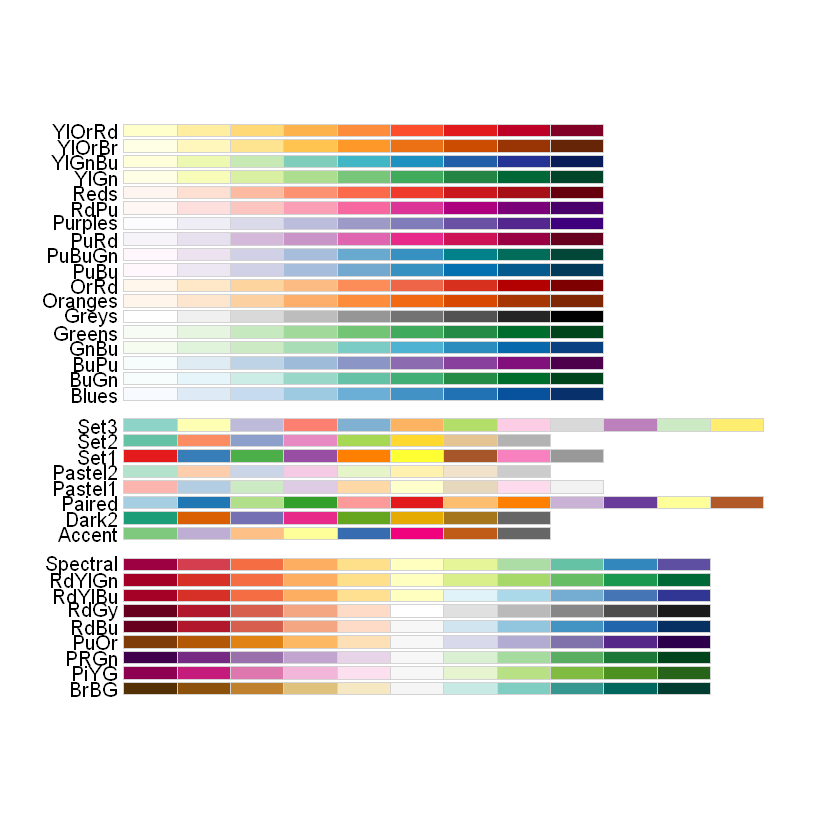

In [6]:
display.brewer.all()
#viridis()

In [7]:
font_add("Tahoma","Tahoma.ttf")
font_add("XKCD","./fonts/xkcd-Regular.otf")
font_add("Roboto Condensed", "./fonts/RobotoCondensed-Regular.ttf")
#font_add("Decima Mono Pro","DecimaMonoPro.otf")
showtext_auto()

In [8]:
ex_df <- read_delim("z_wk05_06_expenditures.txt", delim = "\t")
ex_df["category"][ex_df["category"] == "Miscellaneous"] <- "Misc"
ex_df["category"][ex_df["category"] == "Cash Contributions"] <- "Cash"
ex_df["category"][ex_df["category"] == "Tobacco Products"] <- "Tobacco"
ex_df["category"][ex_df["category"] == "Alcoholic Beverages"] <- "Alcohol"

ex_df <- subset (ex_df, select = -sex)
ex_df

Parsed with column specification:
cols(
  year = col_double(),
  category = col_character(),
  expenditure = col_double(),
  sex = col_double()
)


year,category,expenditure
2008,Food,6443
2008,Alcohol,444
2008,Housing,17109
2008,Apparel,1801
2008,Transportation,8604
2008,Healthcare,2976
2008,Entertainment,2835
2008,Personal Care,616
2008,Reading,116
2008,Education,1046


png 
  2

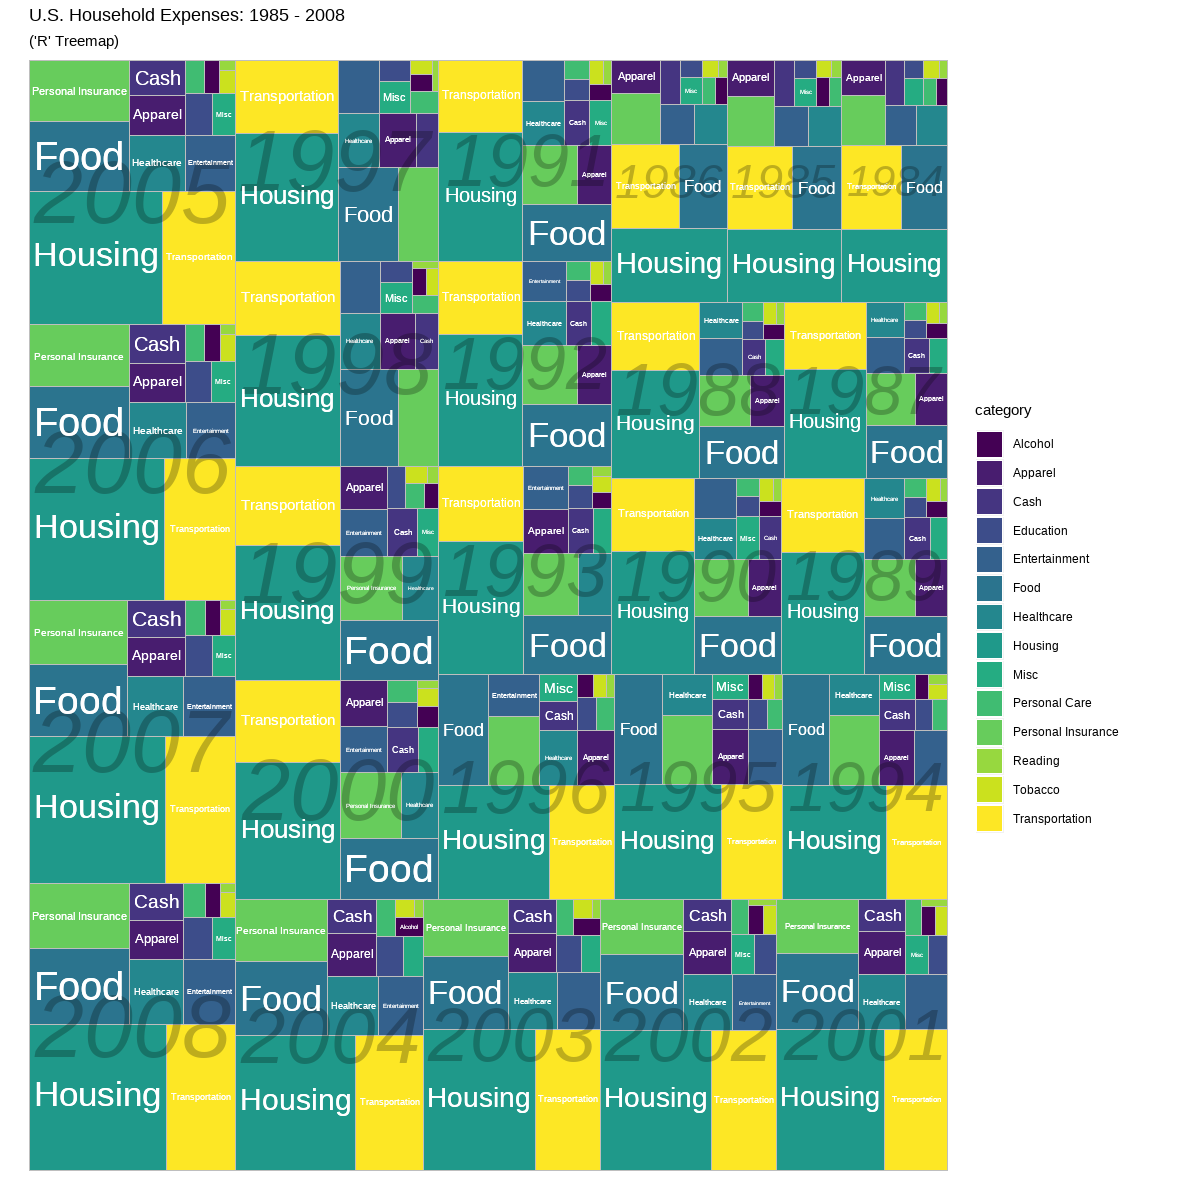

In [21]:
plot_df <- ex_df
options(repr.plot.width = 10, repr.plot.height = 10)
p <- ggplot(plot_df, aes(area=expenditure, fill=category,subgroup=year, label=category)) +
    labs(
        title="U.S. Household Expenses: 1985 - 2008",
        subtitle="('R' Treemap)",
        x="",
        y="",
        size=1.5


    ) +
    geom_treemap() +
    geom_treemap_text(colour = "white",
                   place = "centre",
                   size = 15,
                   grow = TRUE)+
    geom_treemap_subgroup_text(place = "centre", grow = TRUE,
                             alpha = 0.25, colour = "black",
                             fontface = "italic") +
      geom_treemap_text(colour = "white", place = "centre",
                    size = 15, grow = TRUE)+
    
    scale_fill_viridis(discrete = TRUE, option = "D", alpha=.5)
p
jpeg("output_wk05_06_r_treemap_all_expenses.jpg")

print(p)
dev.off()

png 
  2

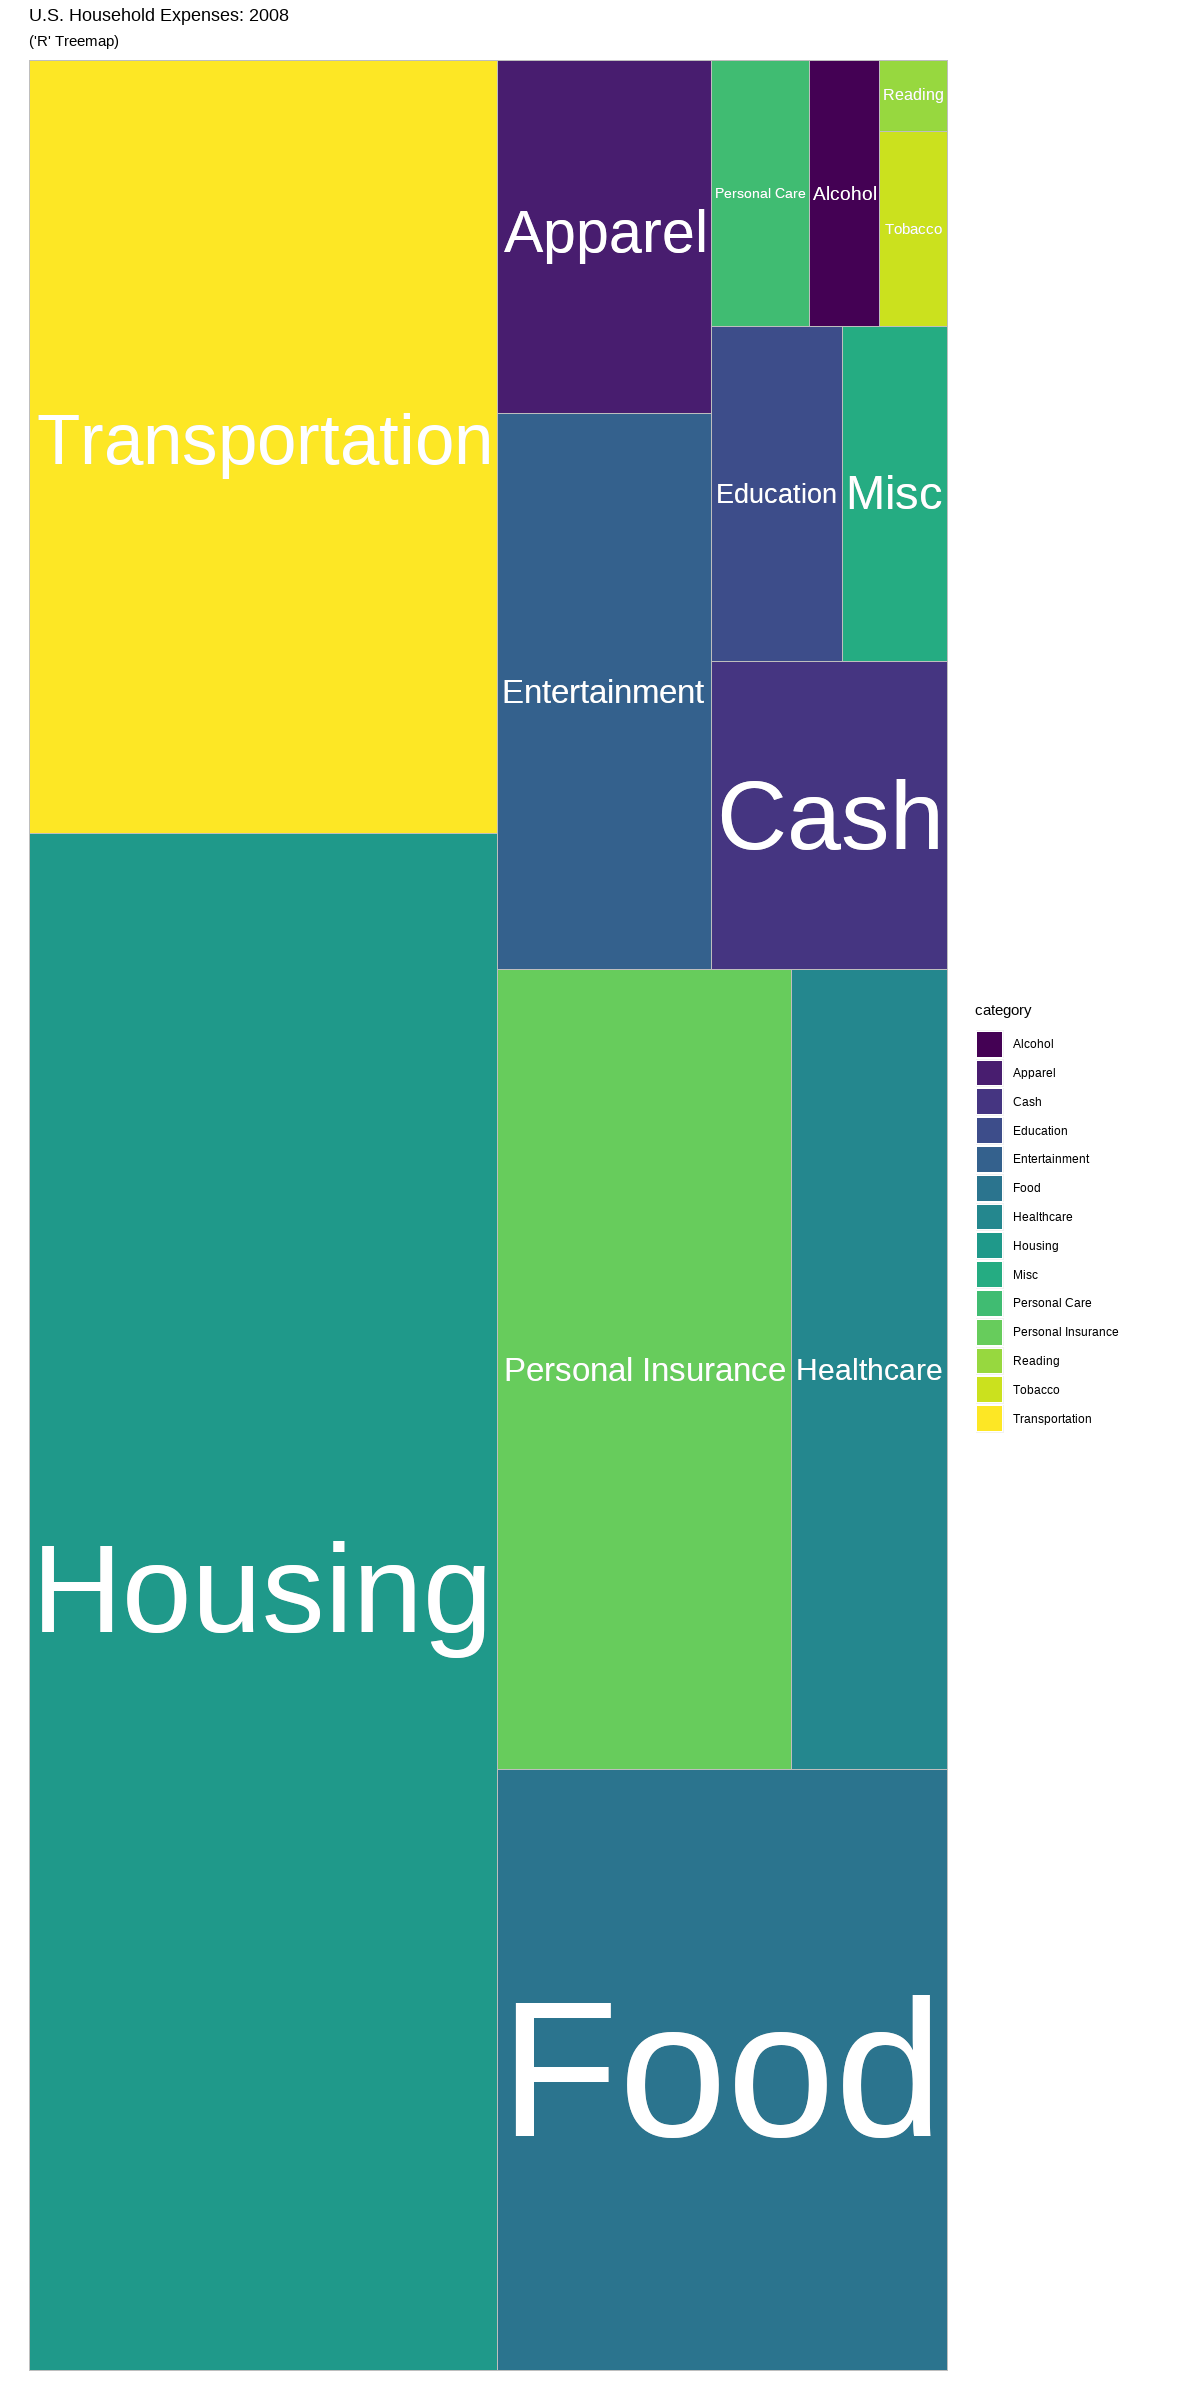

In [22]:
plot_df <- ex_df[ex_df$year == 2008,]
options(repr.plot.width = 10, repr.plot.height = 20)
p <- ggplot(plot_df, aes(area=expenditure, fill=category, label=category)) +
    labs(
        title="U.S. Household Expenses: 2008",
        subtitle="('R' Treemap)",
        x="",
        y="",
        size=1.5


    ) +
    geom_treemap() +
    geom_treemap_text(colour = "grey",
                   place = "centre",
                   size = 15,
                   grow = TRUE)+
      geom_treemap_text(colour = "white", place = "centre",
                    size = 15, grow = TRUE)+
    
    scale_fill_viridis(discrete = TRUE, option = "D", alpha=.5)
p
jpeg("output_wk05_06_r_treemap_2008_expenses.jpg")

print(p)
dev.off()

In [11]:
emp_df <- read_csv("z_wk05_06_unemployement-rate-1948-2010.csv")


Parsed with column specification:
cols(
  `Series id` = col_character(),
  Year = col_double(),
  Period = col_character(),
  Value = col_double()
)


png 
  2

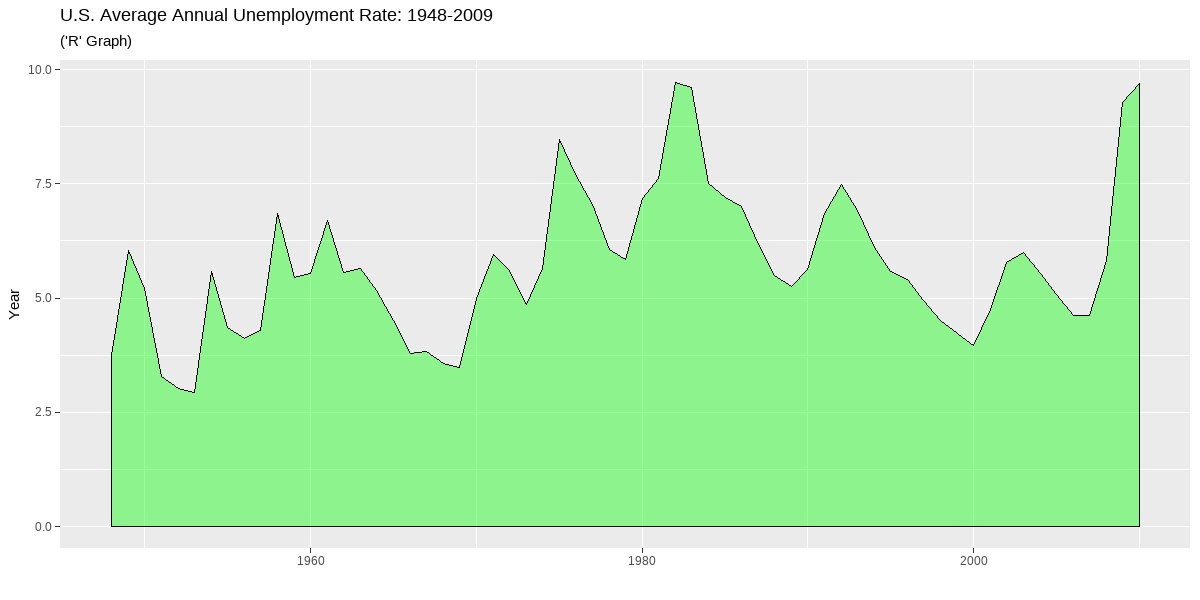

In [24]:
#//*** Get the average unemployment per year
options(repr.plot.width = 10, repr.plot.height = 5)

#//*** Get List of years
years <- unique(emp_df$Year)

#//*** Generate list of averages for each year
avgs <- c()
for (year in years) {
    #avgs[[length(avgs)+1]] <- mean(emp_df[emp_df$Year == year, ]$Value)
    avgs <- append(avgs,mean(emp_df[emp_df$Year == year, ]$Value))
}

plot_df <- data.frame('years'=years)

plot_df$avgs=avgs



fill <- c("#b2d183","#40b8d0")
fill <- c("#c44240","#ca5553", "#d06866", "#d67b79", "#dc8e8c", "#e2a1a0", "#e7b3b3", "#edc6c6", "#f3d9d9", "#f9ecec", "#ffffff")
fill <- c("#d06866", "#e2a1a0", "#f3d9d9", "#f9ecec", "#ffffff")
fontsize <- 20
p <- ggplot(data=plot_df, aes(x=years, y=avgs))+
    geom_area( color='black', fill ='green', size=.3, alpha=.4)+
    labs(
        title="U.S. Average Annual Unemployment Rate: 1948-2009",
        subtitle="('R' Graph)",
        x="",
        y="Year",
        size=1.5


    ) 

p
jpeg("output_wk05_06_r_area_unemployment.jpg")
print(p)
dev.off()

#sum(plot_df["Annual Average Employment"])

In [13]:
ex_df

year,category,expenditure
2008,Food,6443
2008,Alcohol,444
2008,Housing,17109
2008,Apparel,1801
2008,Transportation,8604
2008,Healthcare,2976
2008,Entertainment,2835
2008,Personal Care,616
2008,Reading,116
2008,Education,1046


png 
  2

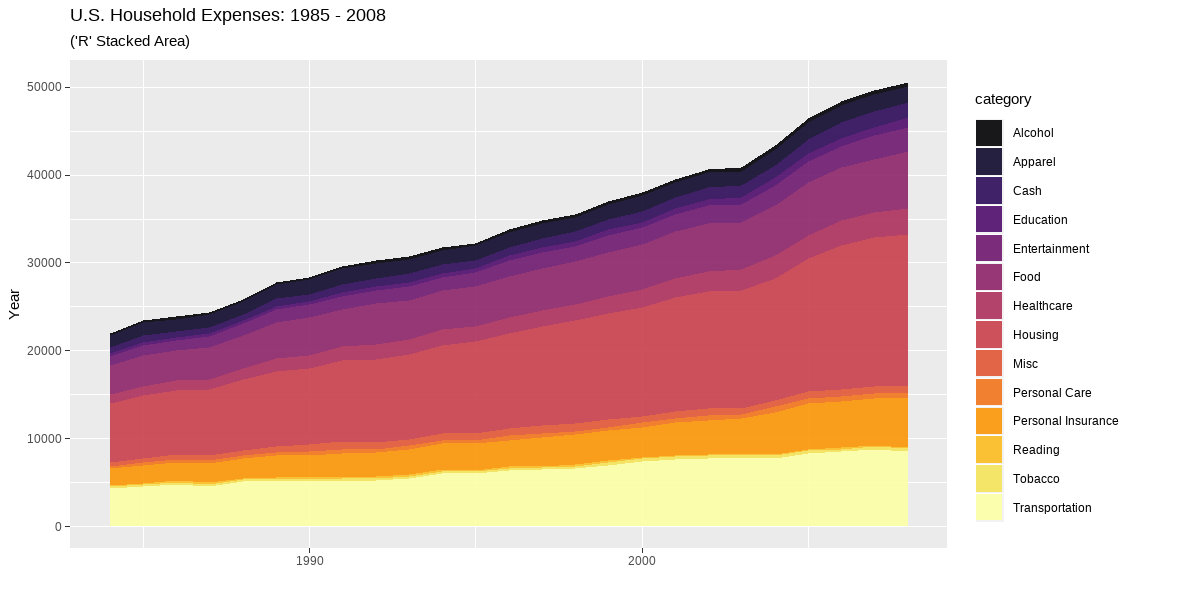

In [26]:


plot_df <- ex_df
options(repr.plot.width = 10, repr.plot.height = 5)




fill <- c("#b2d183","#40b8d0")
fill <- c("#c44240","#ca5553", "#d06866", "#d67b79", "#dc8e8c", "#e2a1a0", "#e7b3b3", "#edc6c6", "#f3d9d9", "#f9ecec", "#ffffff")
fill <- c("#d06866", "#e2a1a0", "#f3d9d9", "#f9ecec", "#ffffff")
fontsize <- 20
p <- ggplot(plot_df, aes(x=year, y=expenditure, fill=category))+
    geom_area( )+
    scale_fill_viridis(discrete = TRUE, option = "B", alpha=.9)+
    labs(
    title="U.S. Household Expenses: 1985 - 2008",
    subtitle="('R' Stacked Area)",
    x="",
    y="Year",
    size=1.5


    ) 

p
jpeg("output_wk05_06_r_stacked_area_expenses.jpg")
print(p)
dev.off()

#sum(plot_df["Annual Average Employment"])